In [1]:
from IPython.display import Image
import ee, folium
#import folium.colormap as cm
import branca
import branca.colormap as cm
ee.Initialize()
print (folium.__file__)
print (folium.__version__)

/home/manmeet/anaconda3/envs/py36/lib/python3.6/site-packages/folium/__init__.py
0.11.0


In [2]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-06-30').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-06-30').mean()
band_viz = {
  'min': 0,
  'max': 0.0002,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
roi = ee.Geometry.Rectangle([65, 5, 98.5, 37])

In [3]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_india = no2_diff.divide(collection19).multiply(100)

roi = ee.Geometry.Rectangle([60, 5, 98.5+5, 37])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_india.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11+2,75.27+5],zoom_start=4, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.45,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_india.html')
map

In [4]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_seasia = no2_diff.divide(collection19).multiply(100)

roi = ee.Geometry.Rectangle([65+30, 5-15, 98.5+40, 37-15])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_seasia.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11-15,75.27+40],zoom_start=4, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_seasia.html')
map

In [5]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-01-24', '2020-03-25').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-01-24', '2019-03-25').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_easia = no2_diff.divide(collection19).multiply(100)
roi = ee.Geometry.Rectangle([65+30, 5+10, 98.5+50, 37+10])
band_viz = {
  'min': -50,
  'max': 50,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-50, vmax=50)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_easia.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11+10,75.27+46],zoom_start=4, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_easia.html')
map

In [6]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_aus = no2_diff.divide(collection19).multiply(100)
roi = ee.Geometry.Rectangle([65+30, 5-44, 98.5+90, 37-40])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_aus.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11-55,75.27+65],zoom_start=3.0, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_aus.html')
map

In [7]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_eu = no2_diff.divide(collection19).multiply(100)

roi = ee.Geometry.Rectangle([60-72, 5+30, 98.5+5-65, 37+23.5])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_eu.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11+27+4-3,75.27+5-67],zoom_start=3.8, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_eu.html')
map

In [8]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_na = no2_diff.divide(collection19).multiply(100)

roi = ee.Geometry.Rectangle([60-200, 5+5, 98.5+5-150, 37+20])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_na.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11+15,75.27+5-175],zoom_start=3.42, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_na.html')
map

In [9]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_sa = no2_diff.divide(collection19).multiply(100)

roi = ee.Geometry.Rectangle([60-200+30, 5+5-60, 98.5+5-150+30, 37+20-45])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_sa.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11+15-67,75.27+5-175+30],zoom_start=3.42, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_sa.html')
map

In [34]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)

roi = ee.Geometry.Rectangle([60-100+20, 5+5-40, 98.5+5-50+60-45, 37+20-45+20])
band_viz = {
  'min': -30,
  'max': 30,
  #'palette': ['yellow', 'orange', 'red']
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}
colormap = cm.LinearColormap(['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red'], vmin=-30, vmax=30)
#colormap = cm.linear.YlOrRd_09.scale(0, 0.0002).to_step(10)
colormap.caption = '% change in column number density'
# no2_diff = collection19.subtract(collection20)
# no2_diff = no2_diff.divide(collection19).multiply(100)
mapid = no2_diff_af.clip(roi).getMapId(band_viz)

map = folium.Map(location=[24.11+15-67+30,75.27+5-75+30-10],zoom_start=3.42, height=550,width=600)

folium.TileLayer(
    tiles=mapid['tile_fetcher'].url_format,
    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    overlay=True,
    name='NO2',
    opacity=0.3,
  ).add_to(map)

map.add_child(folium.LayerControl())
map.add_child(colormap)
#folium.map.LayerControl('topleft', collapsed=False).add_to(map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>NO2 % change (2019-2020) </b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))

map.save('no2_af.html')
map

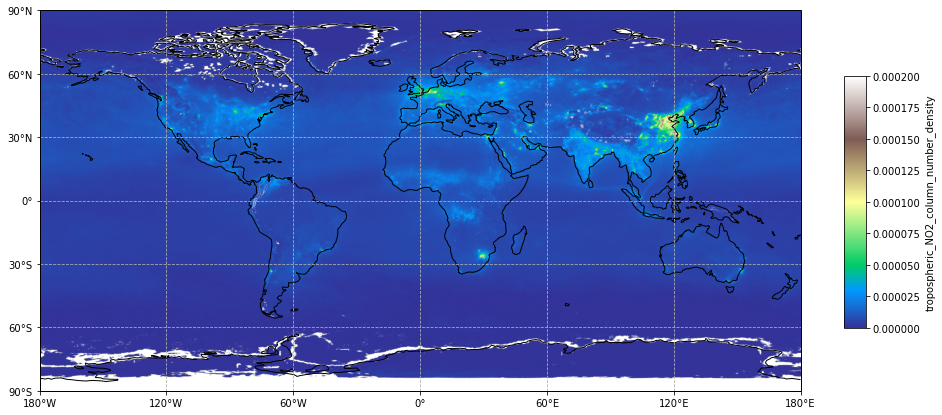

In [31]:
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':0,'max':0.0002,'bands':'tropospheric_NO2_column_number_density'}
bbox = [-180,-90,180,90]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(collection20,ax=ax, cmap=plt.cm.terrain,visParams=visualization,dims=2000)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.terrain,visParams=visualization)

ax.coastlines()

# # set gridlines and spacing
xticks = [-180,-120,-60,0,60,120,180]
yticks = [-90,-60,-30,0,30,60,90]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-180,-120,-60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

# plt.savefig('test.png')

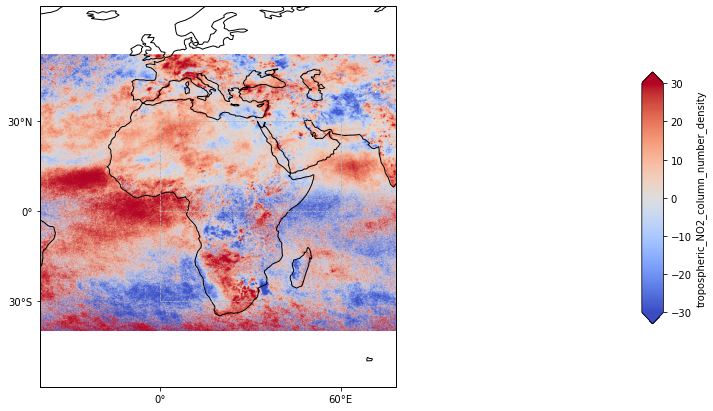

In [66]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [60-120+20, -35, 98.5+5-50+70-45, 37+20-45+40]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([60-120+20, 98.5+5-50+70-45, -35, 37+20-45+40])
# # # set gridlines and spacing
xticks = [0,60]
yticks = [-30,0,30]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# # set tick labels
ax.set_xticks([0, 60], crs=ccrs.PlateCarree())
ax.set_yticks([-30, 0, 30], crs=ccrs.PlateCarree())

plt.savefig('no2_africa.png', dpi=1000)

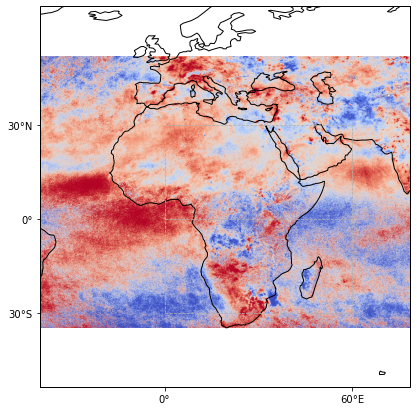

In [73]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [60-120+20, -35, 98.5+5-50+70-45, 37+20-45+40]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([60-120+20, 98.5+5-50+70-45, -35, 37+20-45+40])
# # # set gridlines and spacing
xticks = [0,60]
yticks = [-30,0,30]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# # set tick labels
ax.set_xticks([0, 60], crs=ccrs.PlateCarree())
ax.set_yticks([-30, 0, 30], crs=ccrs.PlateCarree())

plt.savefig('no2_africa_without_colorbar.png', dpi=1000)

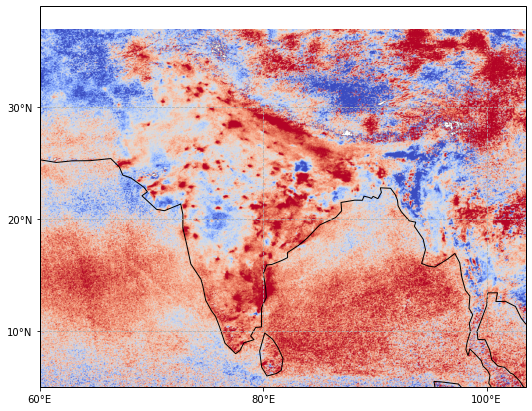

In [63]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [60, 5, 98.5+5, 37]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([60,  98.5+5,5, 37])
# # set gridlines and spacing
xticks = [60,80,100,120]
yticks = [10,20,30]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([60,80,100], crs=ccrs.PlateCarree())
ax.set_yticks([10,20,30], crs=ccrs.PlateCarree())

plt.savefig('no2_india.png', dpi=1000)

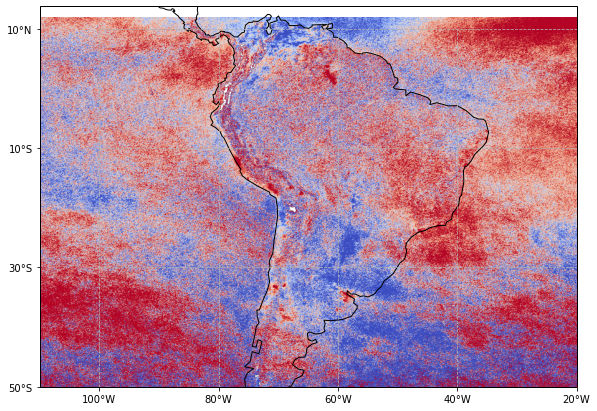

In [53]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [60-200+30, 5+5-60, 98.5+5-150+30, 37+20-45]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([60-200+30, 5+5-60, 98.5+5-150+30, 37+20-45])
# # set gridlines and spacing
xticks = [-100,-80,-60,-40,-20]
yticks = [-50,-30,-10,10]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-100,-80,-60,-40,-20], crs=ccrs.PlateCarree())
ax.set_yticks([-50,-30,-10,10], crs=ccrs.PlateCarree())

plt.savefig('no2_sa.png', dpi=1000)

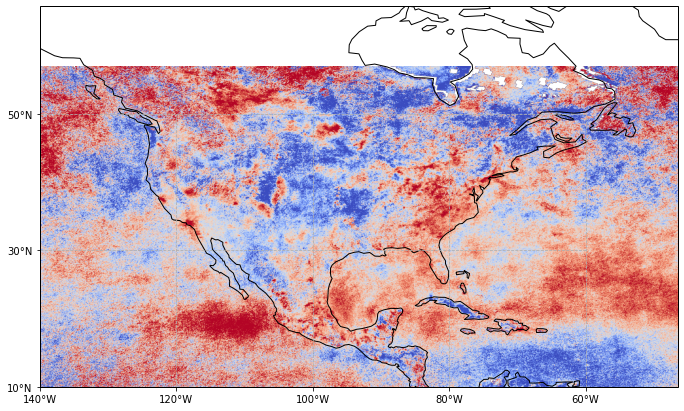

In [67]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [60-200, 5+5, 98.5+5-150, 37+20]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([60-200,  98.5+5-150, 5+5, 37+20])
# # set gridlines and spacing
xticks = [-140,-120,-100,-80,-60]
yticks = [10,30,50]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-140,-120,-100,-80,-60], crs=ccrs.PlateCarree())
ax.set_yticks([10,30,50], crs=ccrs.PlateCarree())

plt.savefig('no2_na.png', dpi=1000)

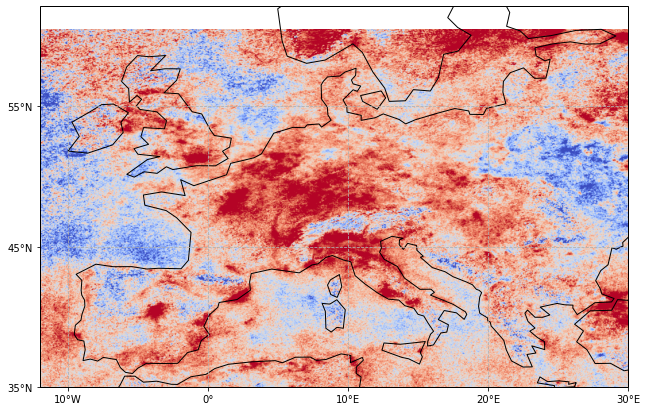

In [68]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-13', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-13', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [60-72, 30, 98.5+5-65, 37+23.5]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([60-72, 30, 98.5+5-65, 37+23.5])
# # set gridlines and spacing
xticks = [-10,0,10,20,30]
yticks = [35,45,55]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-10,0,10,20,30], crs=ccrs.PlateCarree())
ax.set_yticks([35,45,55], crs=ccrs.PlateCarree())

plt.savefig('no2_eu.png', dpi=1000)

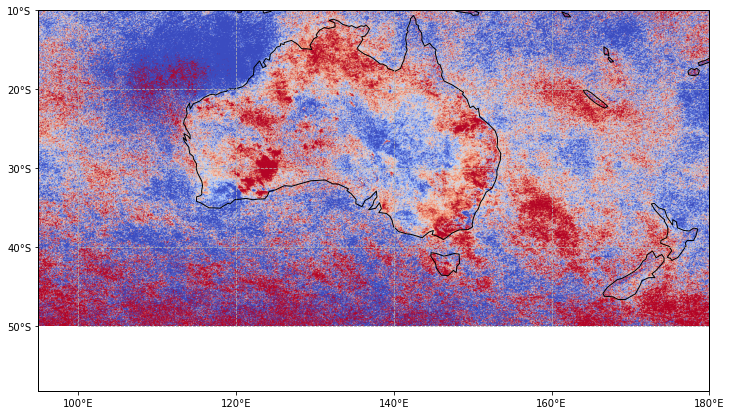

In [85]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-01-24', '2020-03-25').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-01-24', '2019-03-25').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [95, -50, 180, -10]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([95,180  , -50,-10])
# # set gridlines and spacing
xticks = [100,120,140,160,180]
yticks = [-50,-40,-30,-20,-10]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([100,120,140,160,180], crs=ccrs.PlateCarree())
ax.set_yticks([-50,-40,-30,-20,-10], crs=ccrs.PlateCarree())

plt.savefig('no2_aus.png', dpi=1000)



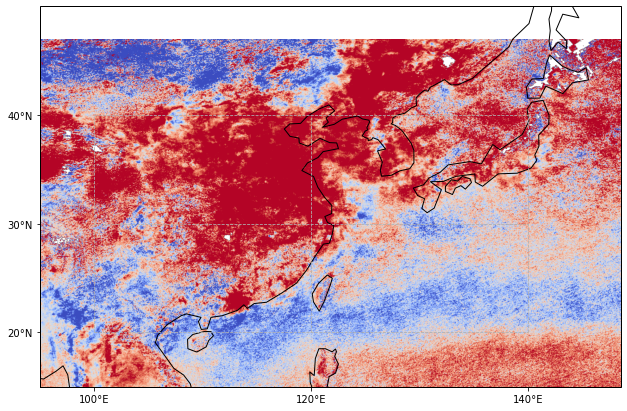

In [70]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-01-24', '2020-03-25').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-01-24', '2019-03-25').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [65+30, 5+10, 98.5+50, 37+10]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([65+30,  98.5+50, 5+10,37+10])
# # set gridlines and spacing
xticks = [100,120,140]
yticks = [20,30,40]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([100,120,140], crs=ccrs.PlateCarree())
ax.set_yticks([20,30,40], crs=ccrs.PlateCarree())

plt.savefig('no2_easia.png', dpi=1000)

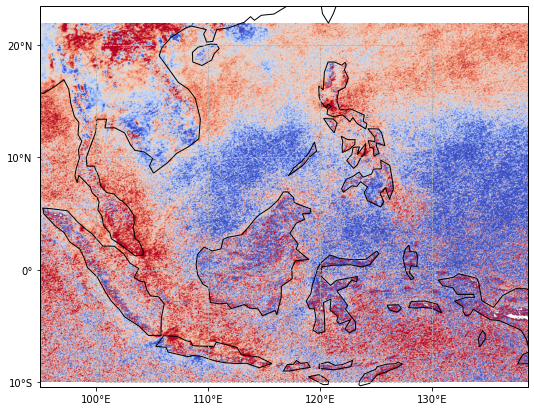

In [71]:
collection20 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2020-03-23', '2020-05-31').mean()
collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
no2_diff = collection19.subtract(collection20)
no2_diff_af = no2_diff.divide(collection19).multiply(100)


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':-30,'max':30,'bands':'tropospheric_NO2_column_number_density'}
bbox = [65+30, 5-15, 98.5+40, 37-15]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.coolwarm,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
#cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.coolwarm,visParams=visualization, extend='both')

ax.coastlines()
ax.set_extent([65+30,  98.5+40, 5-15,37-15])
# # set gridlines and spacing
xticks = [100,110,120,130]
yticks = [-10,0,10,20]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([100,110,120,130], crs=ccrs.PlateCarree())
ax.set_yticks([-10,0,10,20], crs=ccrs.PlateCarree())

plt.savefig('no2_seasia.png', dpi=1000)

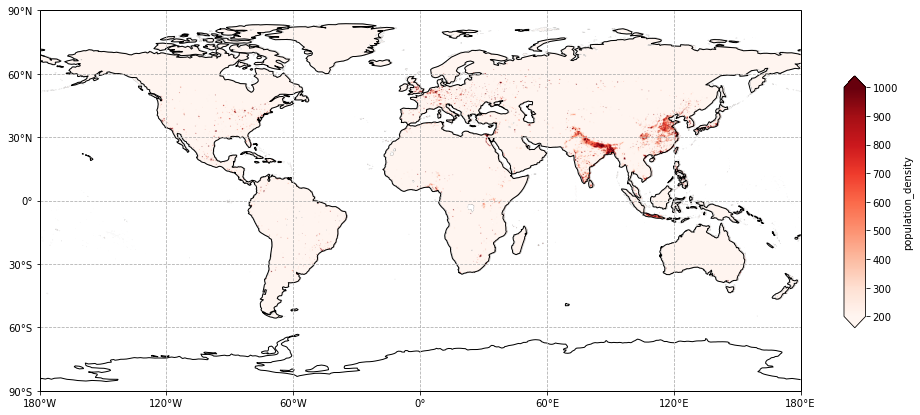

In [77]:
collection20 = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Density").first()
# collection19 = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2').select('tropospheric_NO2_column_number_density').filterDate('2019-03-23', '2019-05-31').mean()
# no2_diff = collection19.subtract(collection20)
# no2_diff_af = no2_diff.divide(collection19).multiply(100)
no2_diff_af = collection20


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.pyplot as plt

# srtm = ee.Image("CGIAR/SRTM90_V4")
# specify visualization parameters and region to map
visualization = {'min':200.0,'max':1000.0,'bands':'population_density'}
bbox = [-180,-90,180,90]

fig = plt.figure(figsize=(15,7))
ax = plt.subplot(projection=ccrs.PlateCarree())
cee.addLayer(no2_diff_af,ax=ax, cmap=plt.cm.Reds,visParams=visualization,dims=2000, region=bbox)

# # plot the map
# #ax = cee.getMap(srtm,cmap='terrain',region=bbox,visParams=visualization,dims=4000)
# # add a color bar using cartoee
# #cb = cee.addColorbar(ax,loc='right',cmap=matplotlib.colors.Colormap('terrain'),visParams=visualization)
cb = cee.addColorbar(ax,loc='right',cmap=plt.cm.Reds,visParams=visualization, extend='both')

ax.coastlines()
#ax.set_extent([65+30,  98.5+40, 5-15,37-15])
# # set gridlines and spacing
xticks = [-180,-120,-60, 0, 60, 120, 180]
yticks = [-90, -60, -30, 0, 30, 60, 90]
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--')

# # set custom formatting for the tick labels
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# set tick labels
ax.set_xticks([-180,-120,-60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())

plt.savefig('population_density.png', dpi=1000)